# Восстановление золота из руды

Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

План исследования:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.

## Подготовка данных

Загружаю необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyRegressor

Загружаю датасеты

### Datasets

#### Train

In [2]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
display(train.head())

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
date                                                  14149 non-null object
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant             

In [4]:
train.duplicated().sum()

0

Тренировочные данные находятся в таблице в 14149 строк и 87 столбцов, есть пропуски. Дубликатов нет.
Данные в date имеют тип object

In [5]:
len(train['date'].unique())

14149

Буду использовать столбец date в качестве индекса (здесь и ниже, после предварительной проверки уникальности дат😊).

In [6]:
train = pd.read_csv('/datasets/gold_recovery_train_new.csv', index_col='date', parse_dates=True)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           14148 non-null float64
final.output.concentrate_pb                           14148 non-null float64
final.output.concentrate_sol                          13938 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14049 non-null float64
final.output.tail_sol                                 14144 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14129 non-null float64
primary_cleaner.input.depressant                      14117 non-null float64
primary_c

Имеем датасет с 15 января 2016 г. по 18 августа 2018 г.

#### Test

In [8]:
test = pd.read_csv('/datasets/gold_recovery_test_new.csv', index_col='date', parse_dates=True)
display(test.head())

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,-500.704369,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,-499.240168,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,-502.151509,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,-498.355873,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,-500.810606,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.input.feed_ag                    

In [10]:
train.duplicated().sum()

0

Тестовая выборка состоит из 52 столбцов, 5290 строк. Пропуски есть.

Известно, что в тестовом наборе нет целевых признаков.

Тестовая выборка стартует 01 сентября 2016 г. и заканчивается 31 декабря 2017 г.

#### Full

In [11]:
full = pd.read_csv('/datasets/gold_recovery_full_new.csv', index_col='date', parse_dates=True)
display(full.head())

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
date,,,,,,,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,127.092003,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,125.629232,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,123.819808,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,122.270188,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,117.988169,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [12]:
full.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 86 columns):
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant                      19402 non-null float64
primary_c

Полный датасет состоит из 19439 строк и 87 столбцов. Есть пропуски.

### Recovery

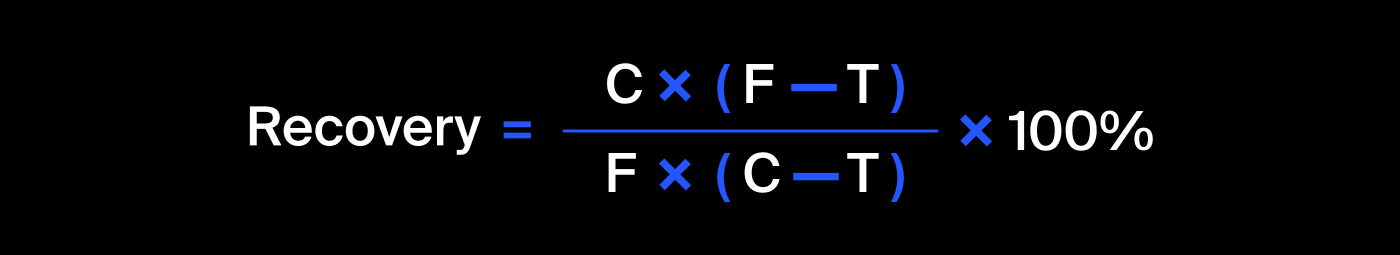

Посчитаю эффективность обогащения на обучающей выборке для rougher.output.recovery

In [13]:
c = train['rougher.output.concentrate_au'] #доля золота в концентрате после флотации/очистки
f = train['rougher.input.feed_au'] #доля золота в сырье/концентрате до флотации/очистки
t = train['rougher.output.tail_au'] #доля золота в отвальных хвостах после флотации/очистки

In [14]:
train['rougher.recovery_au'] = ((c * (f - t)) / (f * (c - t))) * 100

In [15]:
train['rougher.recovery_au'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min         -0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.recovery_au, dtype: float64

In [16]:
train['rougher.output.recovery'].describe()

count    14149.000000
mean        82.704502
std         14.479156
min          0.000000
25%         79.993067
50%         85.299462
75%         90.165021
max        100.000000
Name: rougher.output.recovery, dtype: float64

In [17]:
mae_rougher_au = mean_absolute_error(train['rougher.recovery_au'], train['rougher.output.recovery'])
display(mae_rougher_au)

9.682896147825551e-15

Столбцы-близнецы, формула работает отлично.

### Анализ отсутствующих в тестовой выборке параметров

In [18]:
train_col = train.columns
test_col = test.columns
out_col = train_col.difference(test_col)
display(pd.Series(out_col))

0                           final.output.concentrate_ag
1                           final.output.concentrate_au
2                           final.output.concentrate_pb
3                          final.output.concentrate_sol
4                                 final.output.recovery
5                                  final.output.tail_ag
6                                  final.output.tail_au
7                                  final.output.tail_pb
8                                 final.output.tail_sol
9                 primary_cleaner.output.concentrate_ag
10                primary_cleaner.output.concentrate_au
11                primary_cleaner.output.concentrate_pb
12               primary_cleaner.output.concentrate_sol
13                       primary_cleaner.output.tail_ag
14                       primary_cleaner.output.tail_au
15                       primary_cleaner.output.tail_pb
16                      primary_cleaner.output.tail_sol
17                      rougher.calculation.au_p

Тестовая выборка отличается от тренировочной на 34 столбца. Данные столбцы характеризуют параметры продукта, т.е. на выходе с очередного этапа.

### Предобработка данных

In [19]:
display(full.isna().sum().sort_values
        (ascending=False).head(15))

secondary_cleaner.output.tail_sol           1748
rougher.input.floatbank11_xanthate           453
rougher.state.floatbank10_e_air              436
primary_cleaner.output.concentrate_sol       370
secondary_cleaner.state.floatbank2_a_air     220
final.output.concentrate_sol                 211
rougher.input.feed_size                      145
primary_cleaner.output.concentrate_pb        116
primary_cleaner.input.xanthate               104
final.output.tail_pb                         101
rougher.input.feed_pb                        100
rougher.input.feed_sol                        99
primary_cleaner.output.tail_sol               62
rougher.input.floatbank11_sulfate             44
primary_cleaner.input.depressant              37
dtype: int64

In [20]:
display(train.isna().sum().sort_values
        (ascending=False).head(15))

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
final.output.concentrate_sol                 211
rougher.input.feed_size                      144
primary_cleaner.input.xanthate               100
final.output.tail_pb                         100
rougher.input.feed_pb                        100
primary_cleaner.output.concentrate_pb         86
rougher.input.feed_sol                        78
primary_cleaner.output.tail_sol               46
rougher.input.floatbank11_sulfate             36
primary_cleaner.input.depressant              32
dtype: int64

In [21]:
display(test.isna().sum().sort_values
        (ascending=False).head(15))

rougher.input.floatbank11_xanthate          25
rougher.input.feed_sol                      21
secondary_cleaner.state.floatbank3_a_air     9
rougher.input.floatbank11_sulfate            8
primary_cleaner.input.depressant             5
rougher.input.floatbank10_sulfate            5
primary_cleaner.input.sulfate                4
primary_cleaner.input.xanthate               4
secondary_cleaner.state.floatbank2_a_air     3
rougher.input.feed_rate                      3
secondary_cleaner.state.floatbank2_b_air     2
rougher.input.feed_size                      1
primary_cleaner.input.feed_size              0
rougher.input.floatbank10_xanthate           0
primary_cleaner.state.floatbank8_a_air       0
dtype: int64

В основном, пропуски отмечаются по различным этапам побочных продуктов на различных этапах обработки.

Из условия известно, что некоторые данные отсутсвуют в тестовой выборке, т.к. расчитываются позже, но они могут быть в тренировочной.

Для начала попробую подтянуть данные из полного датасета в тренировочный, а затем из тренировочного в тестовый.

In [22]:
train = train.fillna(full)

In [23]:
display(train.isna().sum().sort_values (ascending=False).head(15))

secondary_cleaner.output.tail_sol           1605
rougher.state.floatbank10_e_air              436
rougher.input.floatbank11_xanthate           428
primary_cleaner.output.concentrate_sol       286
secondary_cleaner.state.floatbank2_a_air     217
final.output.concentrate_sol                 211
rougher.input.feed_size                      144
primary_cleaner.input.xanthate               100
final.output.tail_pb                         100
rougher.input.feed_pb                        100
primary_cleaner.output.concentrate_pb         86
rougher.input.feed_sol                        78
primary_cleaner.output.tail_sol               46
rougher.input.floatbank11_sulfate             36
primary_cleaner.input.depressant              32
dtype: int64

Ничего существенного не случилось.

In [24]:
test = test.fillna(train)

In [25]:
display(test.isna().sum().sort_values (ascending=False).head(15))

rougher.input.floatbank11_xanthate          25
rougher.input.feed_sol                      21
secondary_cleaner.state.floatbank3_a_air     9
rougher.input.floatbank11_sulfate            8
primary_cleaner.input.depressant             5
rougher.input.floatbank10_sulfate            5
primary_cleaner.input.sulfate                4
primary_cleaner.input.xanthate               4
secondary_cleaner.state.floatbank2_a_air     3
rougher.input.feed_rate                      3
secondary_cleaner.state.floatbank2_b_air     2
rougher.input.feed_size                      1
primary_cleaner.input.feed_size              0
rougher.input.floatbank10_xanthate           0
primary_cleaner.state.floatbank8_a_air       0
dtype: int64

И опять без видимых изменений.

Нам известно (из условия, видимо, информация от технологов), что соседние по времени (т.е. по индексу) параметры, часто похожи. Чтобы не терять данные, использую метод ffill.

In [26]:
train = train.ffill()
display(train.isna().sum().sort_values (ascending=False).head(15))

rougher.recovery_au                                   0
rougher.calculation.floatbank11_sulfate_to_au_feed    0
primary_cleaner.state.floatbank8_b_air                0
primary_cleaner.state.floatbank8_b_level              0
primary_cleaner.state.floatbank8_c_air                0
primary_cleaner.state.floatbank8_c_level              0
primary_cleaner.state.floatbank8_d_air                0
primary_cleaner.state.floatbank8_d_level              0
rougher.calculation.sulfate_to_au_concentrate         0
rougher.calculation.floatbank10_sulfate_to_au_feed    0
rougher.calculation.au_pb_ratio                       0
primary_cleaner.state.floatbank8_a_air                0
rougher.input.feed_ag                                 0
rougher.input.feed_pb                                 0
rougher.input.feed_rate                               0
dtype: int64

In [27]:
test = test.ffill()
display(test.isna().sum().sort_values (ascending=False).head(15))

secondary_cleaner.state.floatbank6_a_level    0
secondary_cleaner.state.floatbank6_a_air      0
rougher.state.floatbank10_a_level             0
rougher.state.floatbank10_a_air               0
rougher.input.floatbank11_xanthate            0
rougher.input.floatbank11_sulfate             0
rougher.input.floatbank10_xanthate            0
rougher.input.floatbank10_sulfate             0
rougher.input.feed_au                         0
rougher.input.feed_sol                        0
rougher.input.feed_size                       0
rougher.input.feed_rate                       0
rougher.input.feed_pb                         0
rougher.input.feed_ag                         0
primary_cleaner.state.floatbank8_d_level      0
dtype: int64

От пропусков избавились.

Посмотрим на info()

In [29]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14149 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 87 columns):
final.output.concentrate_ag                           14149 non-null float64
final.output.concentrate_pb                           14149 non-null float64
final.output.concentrate_sol                          14149 non-null float64
final.output.concentrate_au                           14149 non-null float64
final.output.recovery                                 14149 non-null float64
final.output.tail_ag                                  14149 non-null float64
final.output.tail_pb                                  14149 non-null float64
final.output.tail_sol                                 14149 non-null float64
final.output.tail_au                                  14149 non-null float64
primary_cleaner.input.sulfate                         14149 non-null float64
primary_cleaner.input.depressant                      14149 non-null float64
primary_c

In [30]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5290 entries, 2016-09-01 00:59:59 to 2017-12-31 23:59:59
Data columns (total 52 columns):
primary_cleaner.input.sulfate                 5290 non-null float64
primary_cleaner.input.depressant              5290 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5290 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.input.feed_ag                    

Ни одной строчки не потеряно, но если метрики будут страдать, то придется возвращаться и дропать.

## Анализ данных

### Концентрация металлов Au, Ag, Pb на разных этапах очистки

Для анализа использую таблицу full, т.к. в ней содержатся полные данные

#### Флотация начало

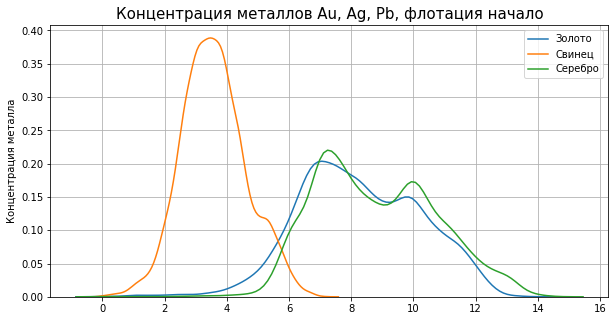

In [32]:
plt.figure(figsize=(10, 5))
plt.title('Концентрация металлов Au, Ag, Pb, флотация начало', fontsize=15)
plt.ylabel('Концентрация металла')

sns.kdeplot(data=full['rougher.input.feed_au'], label = 'Золото')
sns.kdeplot(data=full['rougher.input.feed_pb'], label = 'Свинец')
sns.kdeplot(data=full['rougher.input.feed_ag'], label = 'Серебро')
plt.grid()

Концентрация свинца высокая в начале этапа, далее повышается концентрация золота и серебра

#### Флотация завершение

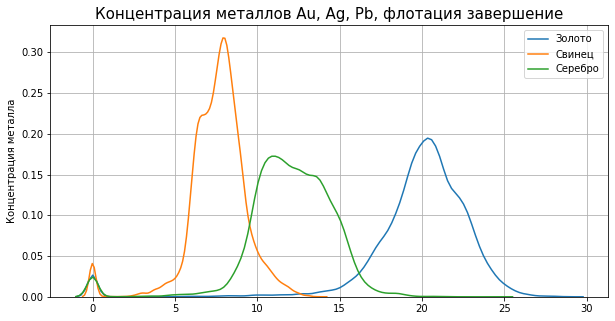

In [33]:
plt.figure(figsize=(10, 5))
plt.title('Концентрация металлов Au, Ag, Pb, флотация завершение', fontsize=15)
plt.ylabel('Концентрация металла')

sns.kdeplot(data=full['rougher.output.concentrate_au'], label = 'Золото')
sns.kdeplot(data=full['rougher.output.concentrate_pb'], label = 'Свинец')
sns.kdeplot(data=full['rougher.output.concentrate_ag'], label = 'Серебро')
plt.grid()

К концу флотации отмечается рост концентрации золота, тогда как концентрации свинца и серебра падают.

#### Первичная очистка

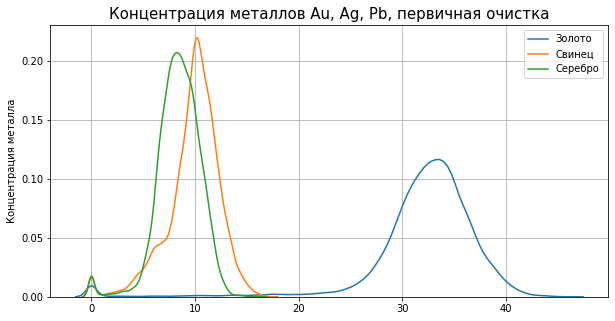

In [34]:
plt.figure(figsize=(10, 5))
plt.title('Концентрация металлов Au, Ag, Pb, первичная очистка', fontsize=15)
plt.ylabel('Концентрация металла')

sns.kdeplot(data=full['primary_cleaner.output.concentrate_au'], label = 'Золото')
sns.kdeplot(data=full['primary_cleaner.output.concentrate_pb'], label = 'Свинец')
sns.kdeplot(data=full['primary_cleaner.output.concentrate_ag'], label = 'Серебро')
plt.grid()

В начале этапа отмечается пик концентрации серебра и свинца, в конце - рост концентрации золота.

#### Вторичная очистка (хвосты)

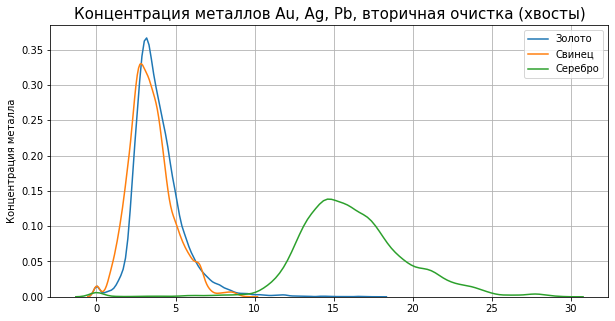

In [35]:
plt.figure(figsize=(10, 5))
plt.title('Концентрация металлов Au, Ag, Pb, вторичная очистка (хвосты)', fontsize=15)
plt.ylabel('Концентрация металла')

sns.kdeplot(data=full['primary_cleaner.output.tail_au'], label = 'Золото')
sns.kdeplot(data=full['primary_cleaner.output.tail_pb'], label = 'Свинец')
sns.kdeplot(data=full['primary_cleaner.output.tail_ag'], label = 'Серебро')
plt.grid()

К концу этапа наибольшая концентрация серебра, а металл-то драгоценный, скорее всего хвосты тоже можно будет использовать.

#### Финальный концентрат

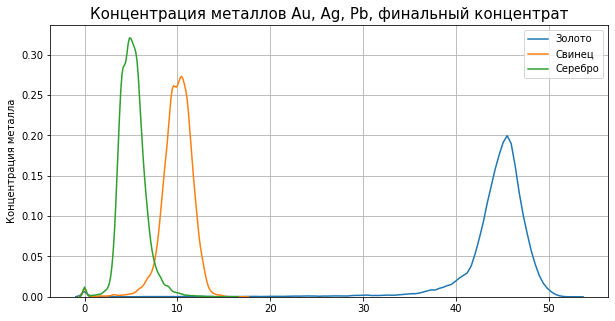

In [36]:
plt.figure(figsize=(10, 5))
plt.title('Концентрация металлов Au, Ag, Pb, финальный концентрат', fontsize=15)
plt.ylabel('Концентрация металла')

sns.kdeplot(data=full['final.output.concentrate_au'], label = 'Золото')
sns.kdeplot(data=full['final.output.concentrate_pb'], label = 'Свинец')
sns.kdeplot(data=full['final.output.concentrate_ag'], label = 'Серебро')
plt.grid()

Ожидаемо, что в финальном концентрате отмечается рост концентрации золота и падение концентрации свинца и серебра.

### Распределение размеров гранул сырья на обучающей и тестовой выборках

Нас будет интересовать параметр feed_size.

Размер гранул фигурирует на 2х этапах: начало флотации и начало первичной очистки.

In [37]:
feed_train = train[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']]
feed_train.head()

,rougher.input.feed_size,primary_cleaner.input.feed_size
date,,
2016-01-15 00:00:00,55.486599,7.25
2016-01-15 01:00:00,57.278666,7.25
2016-01-15 02:00:00,57.510649,7.25
2016-01-15 03:00:00,57.792734,7.25
2016-01-15 04:00:00,56.047189,7.25


In [38]:
feed_test = test[['rougher.input.feed_size', 'primary_cleaner.input.feed_size']]
feed_test.head()

,rougher.input.feed_size,primary_cleaner.input.feed_size
date,,
2016-09-01 00:59:59,62.710452,8.080000
2016-09-01 01:59:59,61.961163,8.080000
2016-09-01 02:59:59,66.903807,7.786667
2016-09-01 03:59:59,59.865919,7.640000
2016-09-01 04:59:59,63.315324,7.530000


Размер гранул на этапе флотации почти что на порядок выше, чем на этапе первичной очистки - логично.

Оценивать размер буду по этапам.

In [39]:
feed_train.describe()

,rougher.input.feed_size,primary_cleaner.input.feed_size
count,14149.000000,14149.000000
mean,60.239856,7.322310
std,23.005310,0.614062
min,9.659576,1.080000
25%,48.966751,6.960000
50%,55.269784,7.290000
75%,66.007526,7.700000
max,484.967466,10.470000


In [40]:
feed_test.describe()

,rougher.input.feed_size,primary_cleaner.input.feed_size
count,5290.000000,5290.000000
mean,55.952754,7.266339
std,19.080334,0.610219
min,0.046369,5.650000
25%,43.906504,6.890000
50%,50.846843,7.250000
75%,62.451165,7.600000
max,392.494040,15.500000


#### Флотация

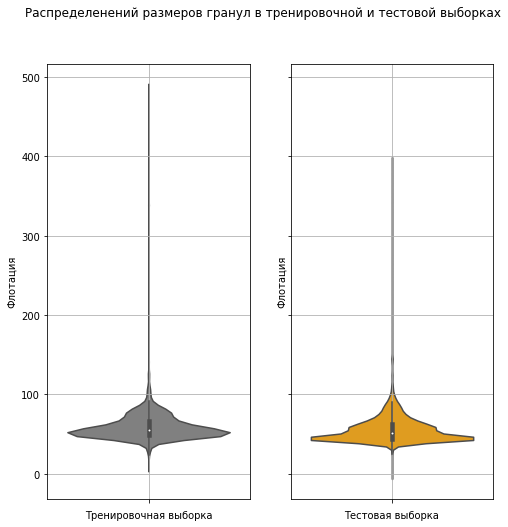

In [41]:
f, ax = plt.subplots(1,2, sharey=True, figsize=(8,8))
plt.suptitle('Распределенений размеров гранул в тренировочной и тестовой выборках')

sns.violinplot(data=feed_train, y='rougher.input.feed_size', ax=ax[0], color='gray')
ax[0].set_xlabel('Тренировочная выборка')
ax[0].set_ylabel('Флотация')

sns.violinplot(data=feed_test, y='rougher.input.feed_size', ax=ax[1], color='orange')
ax[1].set_xlabel('Tестовая выборка')
ax[1].set_ylabel('Флотация')

ax[0].grid()
ax[1].grid()
plt.show()

Почти что близняшки, в тестовой выборке меньше выбросов

#### Первичная очистка

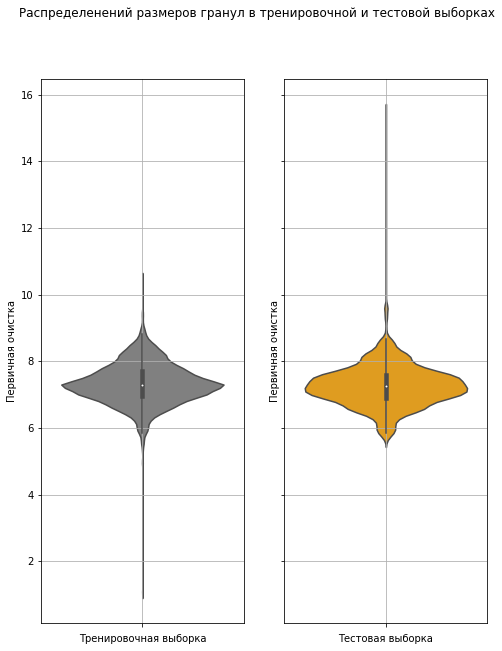

In [42]:
f, ax = plt.subplots(1,2, sharey=True, figsize=(8,10))
plt.suptitle('Распределенений размеров гранул в тренировочной и тестовой выборках')

sns.violinplot(data=feed_train, y='primary_cleaner.input.feed_size', ax=ax[0], color='gray')
ax[0].set_xlabel('Тренировочная выборка')
ax[0].set_ylabel('Первичная очистка')

sns.violinplot(data=feed_test, y='primary_cleaner.input.feed_size', ax=ax[1], color='orange')
ax[1].set_xlabel('Tестовая выборка')
ax[1].set_ylabel('Первичная очистка')

ax[0].grid()
ax[1].grid()
plt.show()

Выбросы раскидались в разные стороны, но эти два ската однозначно родственники, очень похожи.

### Cуммарная концентрация всех веществ

Исследовать буду таблицу full.

In [43]:
full_col = list(full.columns)
conc_col = [v for v in full_col if 'concentrate' in v or 'feed' in v]
garbage_col = [v for v in conc_col if 'size' in v or 'calculation' in v or 'feed_rate' in v or 'primary' in v]
concentrate_col = list(set(conc_col) - set(garbage_col))
concentrate_col

['rougher.output.concentrate_ag',
 'rougher.output.concentrate_sol',
 'rougher.input.feed_sol',
 'rougher.input.feed_au',
 'rougher.output.concentrate_pb',
 'rougher.input.feed_ag',
 'rougher.input.feed_pb',
 'final.output.concentrate_sol',
 'final.output.concentrate_au',
 'rougher.output.concentrate_au',
 'final.output.concentrate_ag',
 'final.output.concentrate_pb']

In [44]:
concentrate_col.sort()
concentrate_col

['final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'rougher.input.feed_ag',
 'rougher.input.feed_au',
 'rougher.input.feed_pb',
 'rougher.input.feed_sol',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol']

Необходимые столбцы выделены, создаю таблицу.

In [45]:
conc_tbl = full[concentrate_col].copy()
conc_tbl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19439 entries, 2016-01-15 00:00:00 to 2018-08-18 10:59:59
Data columns (total 12 columns):
final.output.concentrate_ag       19438 non-null float64
final.output.concentrate_au       19439 non-null float64
final.output.concentrate_pb       19438 non-null float64
final.output.concentrate_sol      19228 non-null float64
rougher.input.feed_ag             19439 non-null float64
rougher.input.feed_au             19439 non-null float64
rougher.input.feed_pb             19339 non-null float64
rougher.input.feed_sol            19340 non-null float64
rougher.output.concentrate_ag     19439 non-null float64
rougher.output.concentrate_au     19439 non-null float64
rougher.output.concentrate_pb     19439 non-null float64
rougher.output.concentrate_sol    19416 non-null float64
dtypes: float64(12)
memory usage: 1.9 MB


#### Сравнение суммарной концентрации всех веществ на этапах "Cырье", "Черновой" и "Финальный"

Нам неизвестен параметр "sol", возможно это один из побочных продуктов, так как присутствует на всех этапах (в том числе и в золотоносной руде на входе), посчитаем и его.

In [46]:
conc_tbl['final_sum'] = conc_tbl.iloc[:,0] + conc_tbl.iloc[:,1] + conc_tbl.iloc[:,2] + conc_tbl.iloc[:,3]
conc_tbl['first_sum'] = conc_tbl.iloc[:,4] + conc_tbl.iloc[:,5] + conc_tbl.iloc[:,6] + conc_tbl.iloc[:,7]
conc_tbl['second_sum'] = conc_tbl.iloc[:,8] + conc_tbl.iloc[:,9] + conc_tbl.iloc[:,10] + conc_tbl.iloc[:,11]
conc_tbl.head(3)

,final.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_pb,final.output.concentrate_sol,rougher.input.feed_ag,rougher.input.feed_au,rougher.input.feed_pb,rougher.input.feed_sol,rougher.output.concentrate_ag,rougher.output.concentrate_au,rougher.output.concentrate_pb,rougher.output.concentrate_sol,final_sum,first_sum,second_sum
date,,,,,,,,,,,,,,,
2016-01-15 00:00:00,6.055403,42.192020,9.889648,5.507324,6.100378,6.486150,2.284912,36.808594,11.500771,19.793808,7.101074,28.029297,63.644396,51.680034,66.424950
2016-01-15 01:00:00,6.029369,42.701629,9.968944,5.257781,6.161113,6.478583,2.266033,35.753385,11.615865,20.050975,7.278807,28.067063,63.957723,50.659114,67.012710
2016-01-15 02:00:00,6.055926,42.657501,10.213995,5.383759,6.116455,6.362222,2.159622,35.971630,11.695753,19.737170,7.216833,27.454037,64.311180,50.609929,66.103793


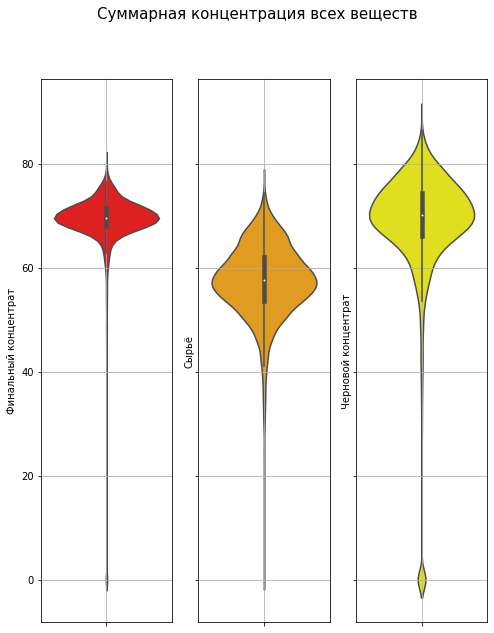

In [47]:
f, ax = plt.subplots(1,3, sharey=True, figsize=(8,10))

plt.suptitle('Суммарная концентрация всех веществ', fontsize=15)

sns.violinplot(data=conc_tbl, y='final_sum', ax=ax[0], color='red')
ax[0].set_ylabel('Финальный концентрат')
ax[0].grid()
sns.violinplot(data=conc_tbl, y='first_sum', ax=ax[1], color='orange')
ax[1].set_ylabel('Сырьё')
ax[1].grid()
sns.violinplot(data=conc_tbl, y='second_sum', ax=ax[2], color='yellow')
ax[2].set_ylabel('Черновой концентрат')
ax[2].grid()

plt.show()

На этапах "Черновой концентрат" и "Финальный концентрат" срединные значения в районе 70, логично, что в финальном концентрате разброс значений меньше. В "Черновом концентрате" странный выброс в области нуля, в "Финальный концентрат" в области нуля также отмечается выброс, но незначительный.

В "Сырье" суммарная концентрация исследуемых элементов ниже, так как объем побочных продуктов в золотоносной руде максимальный.

In [48]:
len(conc_tbl[conc_tbl['second_sum'] == 0])

394

In [49]:
len(conc_tbl[conc_tbl['final_sum'] == 0])

98

In [50]:
len(conc_tbl[conc_tbl['first_sum'] == 0])

0

In [51]:
conc_tbl[conc_tbl['final_sum'] == 0].head()

,final.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_pb,final.output.concentrate_sol,rougher.input.feed_ag,rougher.input.feed_au,rougher.input.feed_pb,rougher.input.feed_sol,rougher.output.concentrate_ag,rougher.output.concentrate_au,rougher.output.concentrate_pb,rougher.output.concentrate_sol,final_sum,first_sum,second_sum
date,,,,,,,,,,,,,,,
2016-02-13 11:00:00,0.0,0.0,0.0,0.0,7.407737,5.598971,1.934178,31.762853,11.803589,15.935190,7.143475,21.692525,0.0,46.703740,56.574778
2016-03-11 10:00:00,0.0,0.0,0.0,0.0,8.098125,7.786147,2.588661,34.896012,10.640168,18.682162,7.565854,24.793448,0.0,53.368945,61.681632
2016-03-11 11:00:00,0.0,0.0,0.0,0.0,7.832467,7.499248,2.435125,34.196525,10.415491,18.231121,7.367937,24.200400,0.0,51.963364,60.214950
2016-03-11 12:00:00,0.0,0.0,0.0,0.0,7.600277,7.032278,2.265148,31.994985,10.197899,18.190655,7.364725,22.839147,0.0,48.892687,58.592426
2016-03-11 13:00:00,0.0,0.0,0.0,0.0,7.436860,7.021635,2.265435,32.541806,9.968103,18.194323,7.282737,22.918014,0.0,49.265736,58.363177


Около 400 нулевых значений в черновом концентрате по ключевым значениям и почти 100 в финальном концентрате, но это данные из full, посмотрим, что в трейне. Нам нужно золото, по имеющейся подборке нулевые значения по всем исследуемым показателям на данных этапах подозрительны. Возможно, это технический сбой, или данные о концентрации веществ в черновом концентрате просто не были внесены, но..

Для модели это нехорошо.

In [52]:
train['final.output.concentrate_au'].describe()

count    14149.000000
mean        44.003792
std          4.905261
min          0.000000
25%         43.276111
50%         44.872436
75%         46.166425
max         52.756638
Name: final.output.concentrate_au, dtype: float64

In [53]:
len(train[train['final.output.concentrate_au'] == 0])

58

In [54]:
train[train['final.output.concentrate_au'] == 0].head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.recovery_au
date,,,,,,,,,,,,,,,,,,,,,
2016-02-13 11:00:00,0.0,0.0,0.0,0.0,0.0,8.894029,0.843584,15.417342,1.779052,133.610147,...,-399.587122,21.988937,-401.366408,22.995012,-399.370680,20.966863,-399.308354,24.987274,-399.619808,68.960993
2016-03-11 10:00:00,0.0,0.0,0.0,0.0,0.0,10.817313,1.462800,16.407607,2.984504,111.502432,...,-453.431061,12.003445,-450.179844,11.982937,-449.856468,9.927727,-450.521700,19.971682,-500.685521,82.787322
2016-03-11 11:00:00,0.0,0.0,0.0,0.0,0.0,10.436792,1.207636,17.800392,2.747294,110.586754,...,-446.590944,12.130405,-449.684812,11.844983,-450.881424,9.916784,-449.542871,20.004767,-500.137068,83.515262
2016-03-11 12:00:00,0.0,0.0,0.0,0.0,0.0,10.637073,1.405778,17.195897,2.791440,104.202288,...,-496.613149,12.055535,-496.908551,12.091144,-496.404140,9.976074,-496.783155,19.921634,-500.769011,83.702224
2016-03-11 13:00:00,0.0,0.0,0.0,0.0,0.0,10.530320,1.461550,17.556860,2.682127,102.438023,...,-500.427824,12.083824,-500.162537,12.078809,-499.903743,10.075259,-499.540325,20.039788,-499.932405,84.836821


58 строк подозрительного отсутствия данных о концентрации в финальном концентрате в train! Хотя даже в хвостах финала сведения имеются.

In [55]:
train['rougher.output.concentrate_au'].describe()

count    14149.000000
mean        19.439958
std          3.765192
min          0.000000
25%         18.432161
50%         19.947312
75%         21.392714
max         28.146838
Name: rougher.output.concentrate_au, dtype: float64

In [56]:
len(train[train['rougher.output.concentrate_au'] == 0])

297

In [57]:
train[train['rougher.output.concentrate_au'] == 0].head()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.recovery_au
date,,,,,,,,,,,,,,,,,,,,,
2016-01-16 21:00:00,4.566664,10.406178,4.588698,46.614456,68.403877,10.705777,1.509070,17.875134,2.509776,131.251366,...,-550.404242,12.028925,-550.570104,10.052072,-500.797905,7.984500,-499.581046,11.982025,-599.161228,-0.0
2016-01-16 22:00:00,4.577832,10.691605,5.274175,46.250638,70.675633,10.728531,1.641216,18.349339,2.540843,141.184039,...,-550.676337,12.004728,-550.496522,9.953139,-500.330920,8.012074,-500.133530,11.975316,-598.839683,-0.0
2016-01-16 23:00:00,4.591462,10.628846,5.688961,46.663335,55.088448,10.694584,1.671644,17.910312,2.686782,126.397495,...,-551.224653,11.971272,-550.095619,9.981163,-502.869109,7.941184,-500.623610,12.018837,-600.916665,-0.0
2016-01-17 00:00:00,5.296830,10.597469,5.688961,44.015642,41.962008,11.975654,1.846558,8.138408,2.889469,69.411904,...,-549.388727,11.975967,-550.778624,9.989726,-499.607365,7.958252,-498.882560,11.967977,-599.440603,-0.0
2016-01-17 02:00:00,8.162896,8.877528,5.688961,40.715973,49.884856,10.381465,1.024030,12.974257,2.739224,116.517762,...,-550.563329,11.999730,-550.549773,9.941869,-503.282068,8.018850,-500.970716,11.991078,-598.475929,-0.0


Почищу трейн 

In [58]:
train = train.loc[~((train['rougher.output.concentrate_au'] == 0) | (train['final.output.concentrate_au'] == 0))]

train.shape

(13795, 87)

Выше проводился анализ отсутствующих данных в тестовой таблице, там этих столбцов нет, мы спокойны.

## Модель

### Вычисление итогового sMAPE

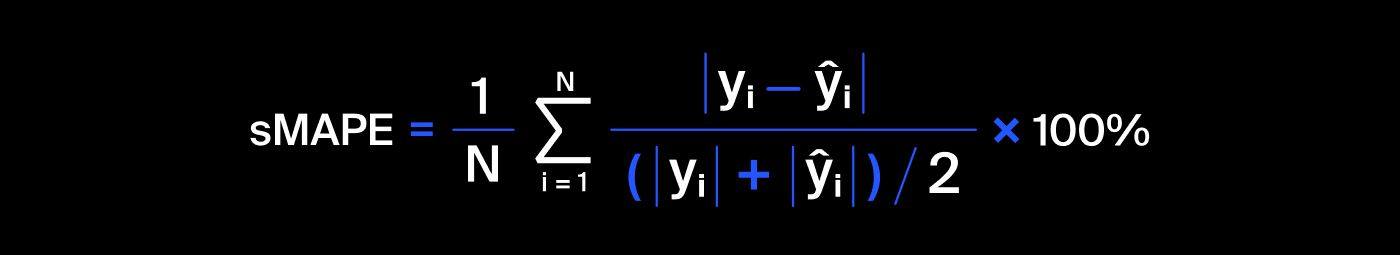

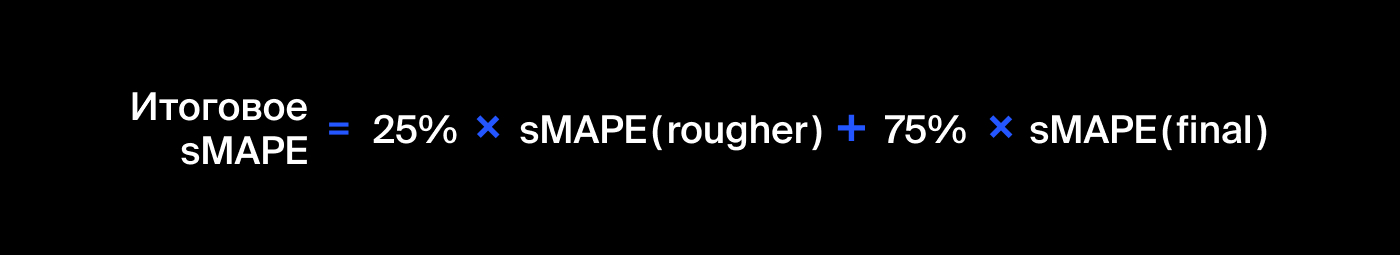

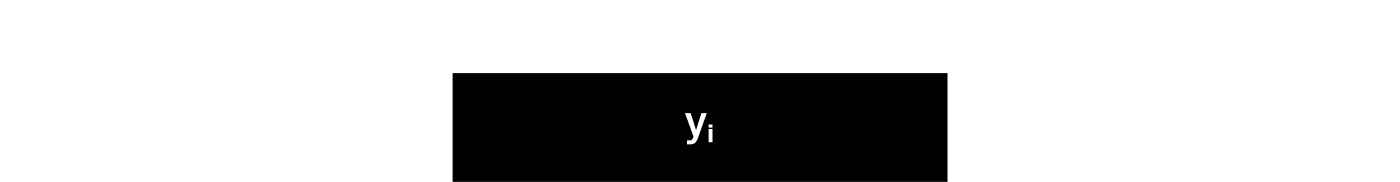
Целевой признак

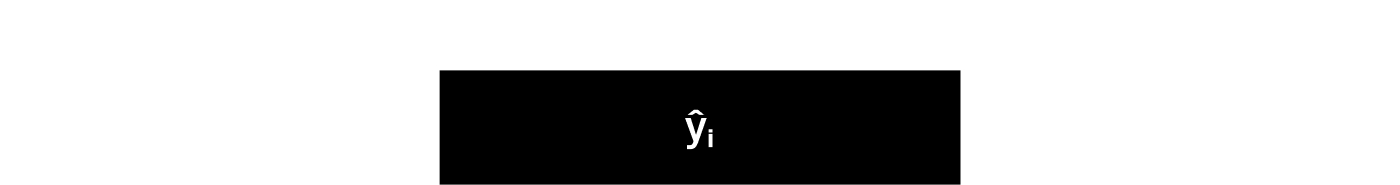
Предсказание

In [59]:
def smape (target, prediction):
    rough, final = 100/len(target) * np.sum(2 * np.abs(target - prediction) / (np.abs(target) + np.abs(prediction)))
    f_smape = 0.25*rough + 0.75*final
    return f_smape

Использую make_score для скоринга, greater_is_better будет False, так как нас интересует наименьшее значение.

In [60]:
f_smape = make_scorer(smape, greater_is_better=False)

Целевые показатели у нас rougher.output.recovery и final.output.recovery. В тестовой выборке параметры выхода отсутствуют.
По сути, это целевые показатели, я думаю, что они не будут помогать обучению модели, поэтому привожу train к test.

In [61]:
target_train = train[['rougher.output.recovery', 'final.output.recovery']]

train = train[test.columns].copy()
target_train.shape, train.shape

((13795, 2), (13795, 52))

In [62]:
target_test = pd.DataFrame(index= test.index, data = full['rougher.output.recovery'])

In [63]:
target_test['final.output.recovery'] = full['final.output.recovery'][test.index]

In [64]:
target_test.shape, test.shape

((5290, 2), (5290, 52))

### Масштабирование

In [65]:
scaler = StandardScaler()

In [66]:
scaler.fit(train[train.columns])
pd.options.mode.chained_assignment = None
train[train.columns] = scaler.transform(train[train.columns])
test[test.columns] = scaler.transform(test[test.columns])

### Модели

Планирую использовать четыре модели:  DecisionTreeRegressor, LinearRegression, KNeighborsRegressor и RandomForestRegressor.

Для подбора наилучших параметров при кросс-валидации буду использовать GridSearchCV

In [67]:
state = np.random.RandomState(1024)

#### DecisionTreeRegressor

In [68]:
dtr = DecisionTreeRegressor(random_state=state)
dtr_par = {
    'max_depth': range(2,15),
    'min_samples_split': range(2,5),
    'splitter': ['best', 'random']
}
dtr_grid = GridSearchCV(estimator=dtr, param_grid=dtr_par, cv=5, scoring=f_smape)

In [69]:
#%%time
#dtr_grid.fit(train, target_train)
#print('Лучшие параметры: ', dtr_grid.best_params_)
#print('Лучшее итоговое sMAPE: {:.3f}'.format(dtr_grid.best_score_))

Лучшие параметры:  {'max_depth': 2, 'min_samples_split': 2, 'splitter': 'random'}

Лучшее итоговое sMAPE: -9.144

CPU times: user 1min 16s, sys: 0 ns, total: 1min 16s

Wall time: 1min 22s

#### LinearRegression

In [70]:
lr = LinearRegression()
lr_par = {
    'fit_intercept' : [True, False],
    'copy_X': [True, False],
    'n_jobs' :[None, -1],
    'normalize' : [True, False]
}
lr_grid = GridSearchCV(estimator=lr, param_grid=lr_par,  cv=5, scoring=f_smape)

In [71]:
#%%time
#lr_grid.fit(train, target_train)
#print('Лучшие параметры: ', lr_grid.best_params_)
#print('Лучшее итоговое sMAPE: {:.3f}'.format(lr_grid.best_score_))

Лучшие параметры:  {'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

Лучшее итоговое sMAPE: -10.060

CPU times: user 10.8 s, sys: 12.4 s, total: 23.2 s

Wall time: 23.5 s

#### KNeighborsRegressor

In [72]:
knr = KNeighborsRegressor()
knr_par = {
    'n_neighbors': range(3,10),
    'n_jobs': [None,-1],
    'weights': ['uniform', 'distance']
}
knr_grid = GridSearchCV(estimator=knr, param_grid=knr_par, cv=5, scoring=f_smape)

In [73]:
#%%time
#knr_grid.fit(train, target_train)
#print('Лучшие параметры: ', knr_grid.best_params_)
#print('Лучшее итоговое sMAPE: {:.3f}'.format(knr_grid.best_score_))

Лучшие параметры:  {'n_jobs': None, 'n_neighbors': 9, 'weights': 'distance'}

Лучшее итоговое sMAPE: -10.218

CPU times: user 5min 49s, sys: 0 ns, total: 5min 49s

Wall time: 5min 56s

#### RandomForestRegressor

In [74]:
rfr = RandomForestRegressor(random_state=state)
rfr_par = {
    'n_estimators': range (3,20),
    'max_depth': range(2,10)
    }
rfr_grid = GridSearchCV(estimator=rfr, param_grid=rfr_par, cv=5, scoring=f_smape)

In [75]:
#%%time
#rfr_grid.fit(train, target_train)
#print('Лучшие параметры: ', rfr_grid.best_params_)
#print('Лучшее итоговое sMAPE: {:.3f}'.format(rfr_grid.best_score_))

Лучшие параметры:  {'max_depth': 3, 'n_estimators': 14}

Лучшее итоговое sMAPE: -8.752

CPU times: user 1min 33s, sys: 35.7 ms, total: 1min 33s

Wall time: 1min 36s

Самая быстрая модель - линейная регрессия, но итоговое sMAPE только 10, случайный лес показывает sMAPE 8,7 - лучший результат, хоть и медленнее (wall time ненастоящее, параметры подобраны поочередно, одновременного ранжирования количества деревьев и глубины длилось ооочень долго, я не дождался).

Выбираю RandomForestRegressor из 14 деревьев и глубиной 3.

### Проверка на тестовой выборке

In [76]:
best_model = RandomForestRegressor(random_state=state, max_depth=3, n_estimators=14)
best_model.fit(test, target_test)
best_predict = best_model.predict(test)
print('Итоговое sMAPE: {:.3f}'.format(smape(target_test, best_predict)))

Итоговое sMAPE: 8.236


### Dummy Regressor

Проверю данные на манекенной модели.

In [77]:
dummy_regressor = DummyRegressor(strategy="median")
dummy_regressor.fit(train, target_train)
dummy_predict = dummy_regressor.predict(test)
final_smape_dummy = smape(target_test, dummy_predict)
print('Итоговое sMAPE на манекенной модели: {:.3f}'.format(final_smape_dummy))

Итоговое sMAPE на манекенной модели: 9.439


### Выводы

Модель отработала хорошо.

Лучшая модель RandomForestRegressor из 14 деревьев и глубиной 3.

Лучшее итоговое sMAPE на тренировочной выборке: 8.752

Лучшее итоговое sMAPE на тестовой выборке: 8.255

Итоговое sMAPE на манекенной модели: 9.439

Золотодобытчики могут спать спокойно.